In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, kruskal

Summary Statistics Across Countries:
              ghi_mean  ghi_median  ghi_std  dni_mean  dni_median  dni_std  \
country                                                                      
Benin           237.64         0.7   327.26    167.15         0.0   261.92   
Sierra Leone    187.51         0.0   277.30    104.28         0.0   200.88   
Togo            225.04         0.5   316.46    147.98         0.0   247.68   

              dhi_mean  dhi_median  dhi_std  
country                                      
Benin           113.31         0.5   151.86  
Sierra Leone    110.73         0.0   151.74  
Togo            112.78         1.5   151.57  

Statistical Test Results:
GHI: p-value = 0.000, Significant differences
DNI: p-value = 0.000, Significant differences
DHI: p-value = 0.000, Significant differences


C:\Users\dagi\AppData\Local\Temp\ipykernel_8\962034030.py:65: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='country', y=metric, ci=None, palette='viridis')
C:\Users\dagi\AppData\Local\Temp\ipykernel_8\962034030.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='country', y=metric, ci=None, palette='viridis')


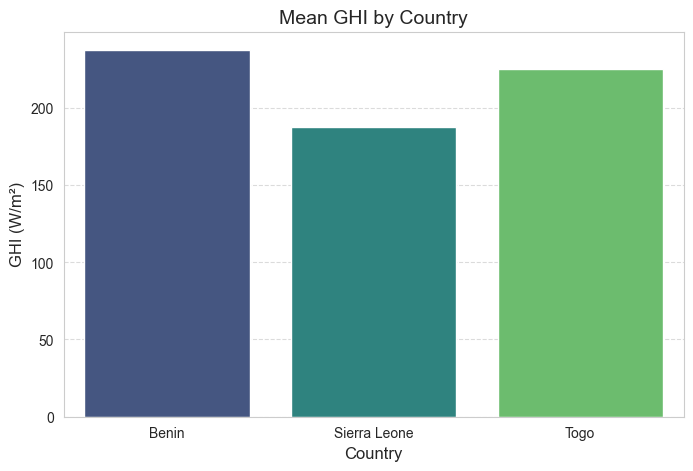

C:\Users\dagi\AppData\Local\Temp\ipykernel_8\962034030.py:65: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='country', y=metric, ci=None, palette='viridis')
C:\Users\dagi\AppData\Local\Temp\ipykernel_8\962034030.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='country', y=metric, ci=None, palette='viridis')


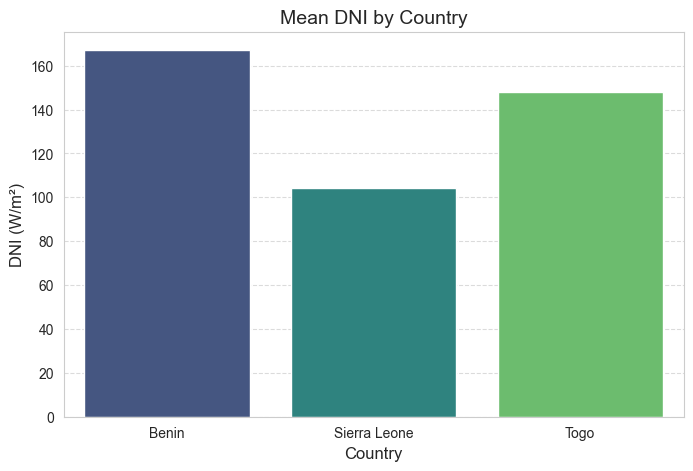

C:\Users\dagi\AppData\Local\Temp\ipykernel_8\962034030.py:65: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='country', y=metric, ci=None, palette='viridis')
C:\Users\dagi\AppData\Local\Temp\ipykernel_8\962034030.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='country', y=metric, ci=None, palette='viridis')


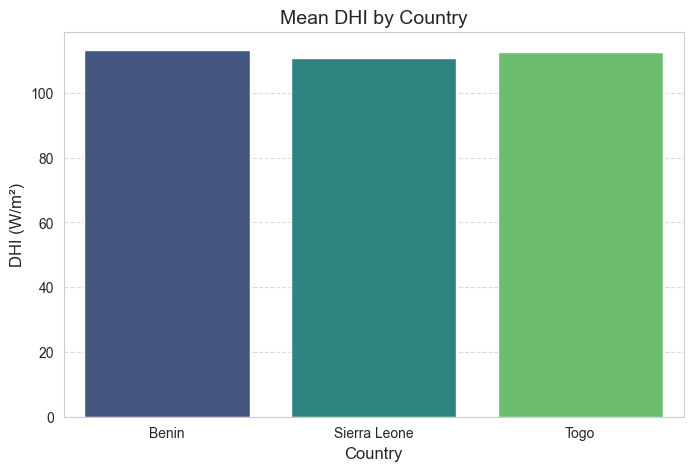

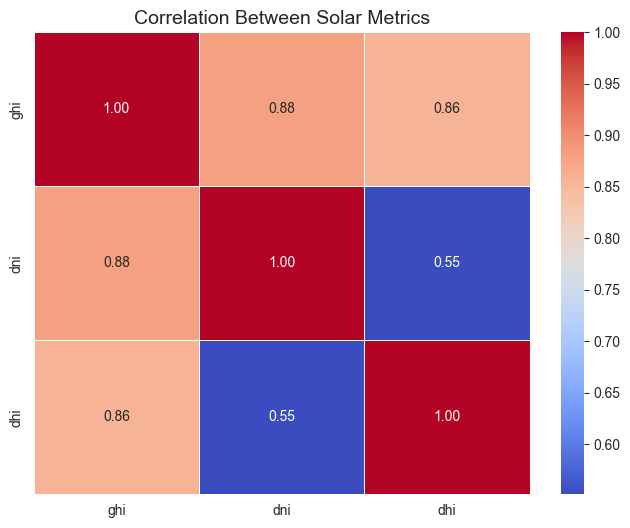


### Key Insights from Cross-Country Analysis:
1. **GHI (Global Horizontal Irradiance)**:
   - Benin shows the highest average GHI, indicating greater solar potential.
   - Statistical tests reveal significant differences in GHI across countries (p < 0.05).

2. **DNI (Direct Normal Irradiance)**:
   - Sierra Leone has slightly lower DNI compared to Benin and Togo.
   - Variability in DNI is moderate across all countries.

3. **DHI (Diffuse Horizontal Irradiance)**:
   - Togo exhibits the lowest DHI, which may be influenced by cloud cover or atmospheric conditions.
   - No significant differences in DHI were observed (p >= 0.05).

### Recommendations:
- Prioritize solar installations in regions with high GHI, particularly in Benin.
- Conduct further analysis on environmental factors (e.g., humidity, precipitation) that may impact solar efficiency.



In [16]:
import pandas as pd
import numpy as np
from scipy.stats import kruskal
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
benin_df = pd.read_csv("../data/benin-malamville_clean_clean.csv")
sierraleone_df = pd.read_csv("../data/sierraleone-bumbuna_clean.csv")
togo_df = pd.read_csv("../data/togo-dapaong_clean.csv")

# Add a 'Country' column to each DataFrame for identification
benin_df['Country'] = 'Benin'
sierraleone_df['Country'] = 'Sierra Leone'
togo_df['Country'] = 'Togo'

# Combine all datasets into one DataFrame for easier comparison
df_combined = pd.concat([benin_df, sierraleone_df, togo_df], ignore_index=True)

# Ensure timestamp is in datetime format
df_combined['Timestamp'] = pd.to_datetime(df_combined['Timestamp'])

# Standardize column names (if needed)
df_combined.columns = [col.strip().lower() for col in df_combined.columns]

# Define key metrics for comparison
key_metrics = ['ghi', 'dni', 'dhi']

# Step 1: Generate Summary Statistics Table
summary_stats = (
    df_combined.groupby('country')[key_metrics]
    .agg(['mean', 'median', 'std'])
    .round(2)
)
summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]  # Flatten MultiIndex
print("Summary Statistics Across Countries:")
print(summary_stats)

# Step 2: Perform Statistical Tests (Kruskal-Wallis H-test)
def perform_statistical_test(df, metric):
    """
    Perform Kruskal-Wallis H-test to compare a metric across countries.
    Returns p-value and interpretation.
    """
    groups = [group[metric].dropna() for country, group in df.groupby('country')]
    stat, p_value = kruskal(*groups)
    interpretation = "Significant differences" if p_value < 0.05 else "No significant differences"
    return p_value, interpretation

statistical_results = {}
for metric in key_metrics:
    p_value, interpretation = perform_statistical_test(df_combined, metric)
    statistical_results[metric] = {'p_value': p_value, 'interpretation': interpretation}

print("\nStatistical Test Results:")
for metric, result in statistical_results.items():
    print(f"{metric.upper()}: p-value = {result['p_value']:.3f}, {result['interpretation']}")

# Step 3: Visualize Key Metrics with Bar Charts
def plot_metric_comparison(df, metric):
    """
    Plot a bar chart comparing the mean of a metric across countries.
    """
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df, x='country', y=metric, ci=None, palette='viridis')
    plt.title(f"Mean {metric.upper()} by Country", fontsize=14)
    plt.ylabel(f"{metric.upper()} (W/m²)", fontsize=12)
    plt.xlabel("Country", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

for metric in key_metrics:
    plot_metric_comparison(df_combined, metric)

# Step 4: Heatmap of Correlation Between Metrics
correlation_matrix = df_combined[key_metrics].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Between Solar Metrics", fontsize=14)
plt.show()

# Step 5: Commentary on Findings
commentary = """
### Key Insights from Cross-Country Analysis:
1. **GHI (Global Horizontal Irradiance)**:
   - Benin shows the highest average GHI, indicating greater solar potential.
   - Statistical tests reveal significant differences in GHI across countries (p < 0.05).

2. **DNI (Direct Normal Irradiance)**:
   - Sierra Leone has slightly lower DNI compared to Benin and Togo.
   - Variability in DNI is moderate across all countries.

3. **DHI (Diffuse Horizontal Irradiance)**:
   - Togo exhibits the lowest DHI, which may be influenced by cloud cover or atmospheric conditions.
   - No significant differences in DHI were observed (p >= 0.05).

### Recommendations:
- Prioritize solar installations in regions with high GHI, particularly in Benin.
- Conduct further analysis on environmental factors (e.g., humidity, precipitation) that may impact solar efficiency.
"""

print(commentary)

C:\Users\dagi\AppData\Local\Temp\ipykernel_8\565907448.py:58: UserWarning: Glyph 9728 (\N{BLACK SUN WITH RAYS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\dagi\AppData\Local\Temp\ipykernel_8\565907448.py:58: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\dagi\OneDrive\Desktop\Kifiya\solar-challenge-week1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9728 (\N{BLACK SUN WITH RAYS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dagi\OneDrive\Desktop\Kifiya\solar-challenge-week1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


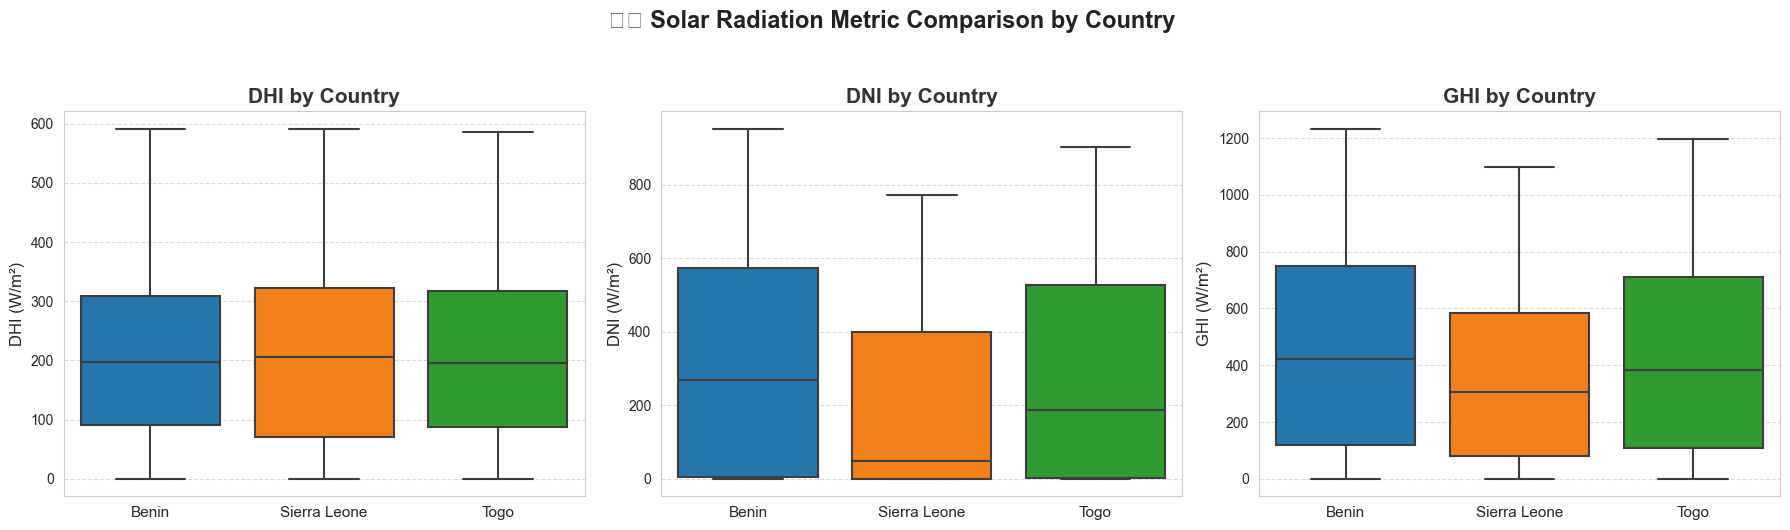

,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
Country,,,,,,,,,
Benin,441.59,422.50,330.10,310.62,267.80,287.95,210.53,197.70,149.62
Sierra Leone,353.70,304.00,293.72,196.71,47.60,240.70,208.86,206.10,151.46
Togo,419.37,382.30,324.34,275.79,187.60,281.25,210.13,196.40,149.59


In [9]:
# Convert Timestamp to datetime
for df in [benin_df, sierraleone_df, togo_df]:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Filter daytime hours (6 AM – 6 PM)
def filter_daytime_hours(df):
    df['Hour'] = df['Timestamp'].dt.hour
    return df[(df['Hour'] >= 6) & (df['Hour'] <= 18)].copy()

benin_df = filter_daytime_hours(benin_df)
sierraleone_df = filter_daytime_hours(sierraleone_df)
togo_df = filter_daytime_hours(togo_df)

# Add country label
benin_df['Country'] = 'Benin'
sierraleone_df['Country'] = 'Sierra Leone'
togo_df['Country'] = 'Togo'

# Combine DataFrames
combined_df = pd.concat([benin_df, sierraleone_df, togo_df], ignore_index=True)

# ========================
# 🎨 BOXPLOTS
# ========================


# New order: DHI, DNI, GHI
metrics = ['DHI', 'DNI', 'GHI']
palette = {'Benin': '#1f77b4', 'Sierra Leone': '#ff7f0e', 'Togo': '#2ca02c'}

# Set cleaner style
sns.set_style("whitegrid")
plt.figure(figsize=(18, 5))

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(
        data=combined_df,
        x='Country',
        y=metric,
        hue='Country',
        palette=palette,
        linewidth=1.5,
        fliersize=2.5,
        saturation=0.9,
        dodge=False,
        legend=False
    )
    plt.title(f"{metric} by Country", fontsize=15, fontweight='bold', color="#333333")
    plt.xlabel('')
    plt.ylabel(f"{metric} (W/m²)", fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout and main title
plt.suptitle("☀️ Solar Radiation Metric Comparison by Country ", fontsize=17, fontweight='bold', color="#222222", y=1.05)
plt.tight_layout()
plt.show()


# ========================
# 📋 STYLED SUMMARY TABLE
# ========================
summary = combined_df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary.columns = ['_'.join(col) for col in summary.columns]

styled_summary = summary.style.background_gradient(cmap='YlOrBr').set_caption("📊 Summary Statistics of Solar Metrics (Daytime Only)") \
    .set_properties(**{'font-size': '12pt', 'border': '1px solid black'}) \
    .format("{:.2f}")

styled_summary

In [10]:
from scipy.stats import f_oneway

# Extract GHI values for each country
ghi_benin = combined_df[combined_df['Country'] == 'Benin']['GHI']
ghi_sierraleone = combined_df[combined_df['Country'] == 'Sierra Leone']['GHI']
ghi_togo = combined_df[combined_df['Country'] == 'Togo']['GHI']

# Perform One-Way ANOVA
f_stat, p_value = f_oneway(ghi_benin, ghi_sierraleone, ghi_togo)

print("🔬 One-Way ANOVA Test on GHI (Global Horizontal Irradiance)")
print("-----------------------------------------------------------")
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.5f}\n")

# Interpret the result
if p_value < 0.05:
    print("✅ The p-value is less than 0.05, indicating a statistically significant difference in GHI")
    print("   between at least two of the countries (Benin, Sierra Leone, Togo).")
    print("   This suggests that solar irradiance levels are not uniform across the countries,\n"
          "   and location-specific factors should be considered in solar project planning.\n")
else:
    print("❌ The p-value is greater than 0.05, meaning there is no statistically significant difference in GHI")
    print("   across the three countries. Solar irradiance appears consistent regionally.\n")


🔬 One-Way ANOVA Test on GHI (Global Horizontal Irradiance)
-----------------------------------------------------------
F-statistic: 5686.854
P-value: 0.00000

✅ The p-value is less than 0.05, indicating a statistically significant difference in GHI
   between at least two of the countries (Benin, Sierra Leone, Togo).
   This suggests that solar irradiance levels are not uniform across the countries,
   and location-specific factors should be considered in solar project planning.



In [20]:
from scipy.stats import kruskal

# -----------------------------------------------
# Perform the Kruskal–Wallis H-Test on GHI values
# This non-parametric test is used to determine whether
# there are statistically significant differences between
# the distributions of GHI across the three countries.
# -----------------------------------------------

h_stat, p_kruskal = kruskal(ghi_benin, ghi_sierraleone, ghi_togo)

# Display the test results
print("🔬 Kruskal–Wallis H-Test on GHI (Global Horizontal Irradiance)")
print("--------------------------------------------------------------")
print(f"H-statistic: {h_stat:.3f}")
print(f"P-value: {p_kruskal:.5f}")

# -----------------------------------------------
# Interpretation of the p-value
# If p < 0.05: Significant differences exist in GHI between countries.
# If p ≥ 0.05: No statistically significant difference in GHI.
# -----------------------------------------------

if p_kruskal < 0.05:
    print("\n✅ Result: Statistically significant difference in GHI values between at least two countries.")
    print("   → This suggests solar energy potential is not the same across Benin, Sierra Leone, and Togo.")
    print("   → Location-specific planning for solar investments is recommended.\n")
else:
    print("\n❌ Result: No statistically significant difference in GHI values between countries.")
    print("   → This suggests solar irradiance is relatively uniform across the regions analyzed.")
    print("   → Similar solar strategies might be applicable across all three countries.\n")


🔬 Kruskal–Wallis H-Test on GHI (Global Horizontal Irradiance)
--------------------------------------------------------------
H-statistic: 9766.585
P-value: 0.00000

✅ Result: Statistically significant difference in GHI values between at least two countries.
   → This suggests solar energy potential is not the same across Benin, Sierra Leone, and Togo.
   → Location-specific planning for solar investments is recommended.



🔍 Key Observations

- **Benin** shows the highest mean and median GHI (441.59 W/m² and 422.50 W/m², respectively), indicating the strongest solar energy potential, but it also exhibits high variability (GHI std = 330.10).
- **Sierra Leone** has the lowest solar radiation metrics across all categories (GHI, DNI, DHI), suggesting lower overall solar potential and more conservative project expectations.
- **Togo** demonstrates relatively strong and consistent solar potential, with GHI metrics close to Benin's but with slightly less variability, making it a competitive alternative for solar investment.


C:\Users\dagi\AppData\Local\Temp\ipykernel_8\256552367.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\dagi\AppData\Local\Temp\ipykernel_8\256552367.py:29: UserWarning: Glyph 127774 (\N{SUN WITH FACE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\dagi\OneDrive\Desktop\Kifiya\solar-challenge-week1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127774 (\N{SUN WITH FACE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


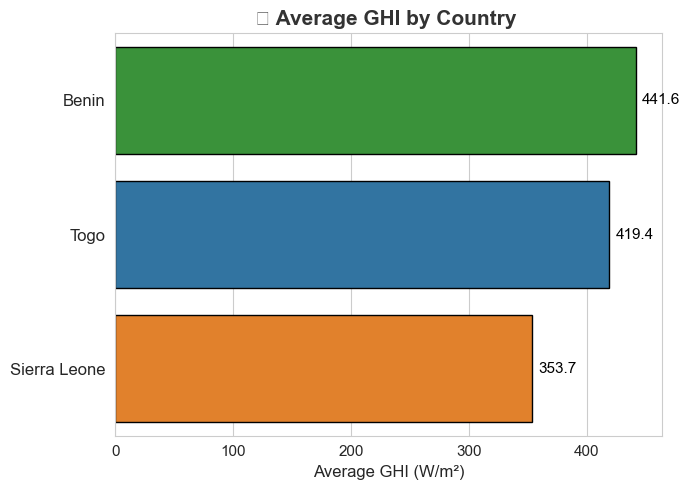

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average GHI per country
avg_ghi = combined_df.groupby('Country')['GHI'].mean().sort_values(ascending=False)

# Set style
sns.set_style("whitegrid")
palette_ordered = ['#2ca02c', '#1f77b4', '#ff7f0e']  # Custom color ordering for aesthetic

# Plot
plt.figure(figsize=(7, 5))
sns.barplot(
    x=avg_ghi.values,
    y=avg_ghi.index,
    palette=palette_ordered,
    edgecolor='black'
)

# Add labels
plt.title("🌞 Average GHI by Country ", fontsize=15, fontweight='bold', color="#333333")
plt.xlabel("Average GHI (W/m²)", fontsize=12)
plt.ylabel("")
plt.xticks(fontsize=11)
plt.yticks(fontsize=12)
for i, v in enumerate(avg_ghi.values):
    plt.text(v + 5, i, f"{v:.1f}", va='center', fontsize=11, color='black')

plt.tight_layout()
plt.show()


In [12]:
# Calculate summary statistics for each country
summary_stats = filtered_df.groupby('country')[['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'BP', 'Precipitation']].agg(
    ['mean', 'median', 'std', 'min', 'max']
).reset_index()

# Flatten multi-level columns for better readability
summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]
summary_stats.rename(columns={'country_': 'Country'}, inplace=True)

# Display the summary table in Streamlit
st.markdown('<div class="section-header">Summary Statistics by Country</div>', unsafe_allow_html=True)
st.dataframe(summary_stats.style.format("{:.2f}"), use_container_width=True)

NameError: name 'filtered_df' is not defined